In [129]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import collections
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from IPython.core.pylabtools import figsize
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.datasets import make_classification

In [130]:
dataSet = pd.read_csv("train.csv")

In [131]:
inputs = dataSet.drop(['Cover_Type','Id'], axis=1)
target = dataSet.Cover_Type

In [132]:
X_train, X_valid, y_train, y_valid = train_test_split(inputs, target, test_size=0.10, random_state=1)

In [133]:
myModel = GridSearchCV(GaussianNB(),{
    'var_smoothing':[1e-9, 7e-9, 9e-9, 5, 10],
}, cv=10, return_train_score=True)
myModel.fit(X_train, y_train)
df = pd.DataFrame(myModel.cv_results_)

In [134]:
df[['param_var_smoothing', 'mean_test_score']]

,param_var_smoothing,mean_test_score
0,0.0,0.588846
1,0.0,0.634040
2,0.0,0.642050
3,5,0.274544
4,10,0.268593


In [135]:
naiveModel = GaussianNB(var_smoothing=7e-9)
naiveModel.fit(X_train, y_train)

GaussianNB(var_smoothing=7e-09)

In [136]:
y_predict = naiveModel.predict(X_valid)

In [137]:
print(classification_report(y_valid,y_predict))

              precision    recall  f1-score   support

           1       0.57      0.74      0.65       234
           2       0.61      0.32      0.42       212
           3       0.51      0.75      0.61       204
           4       0.78      0.92      0.85       225
           5       0.60      0.70      0.65       206
           6       0.75      0.28      0.41       215
           7       0.86      0.82      0.84       216

    accuracy                           0.65      1512
   macro avg       0.67      0.65      0.63      1512
weighted avg       0.67      0.65      0.63      1512



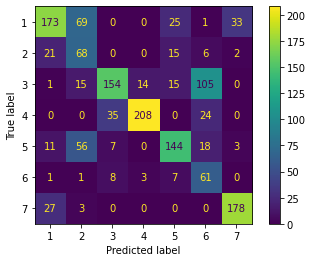

In [138]:
confusion_matrix = metrics.confusion_matrix(y_predict, y_valid)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = naiveModel.classes_)
cm_display.plot()
plt.show()

In [139]:
TestSet = pd.read_csv("test.csv")
print("Number of Rows in the set is: ",TestSet.shape)

Number of Rows in the set is:  (565892, 55)


In [140]:
reDefinedTestSet = TestSet.drop(['Id'], axis=1)
reDefinedTestSet.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,2680,354,14,0,0,2684,196,214,156,6645,...,0,0,0,0,0,0,0,0,0,0
1,2683,0,13,0,0,2654,201,216,152,6675,...,0,0,0,0,0,0,0,0,0,0
2,2713,16,15,0,0,2980,206,208,137,6344,...,0,0,0,0,0,0,0,0,0,0
3,2709,24,17,0,0,2950,208,201,125,6374,...,0,0,0,0,0,0,0,0,0,0
4,2706,29,19,0,0,2920,210,195,115,6404,...,0,0,0,0,0,0,0,0,0,0


In [141]:
NaivePrediction = naiveModel.predict(reDefinedTestSet)

In [142]:
trees = collections.Counter(NaivePrediction)
var = pd.DataFrame(trees.items())
var.columns = ['Cover_Type','Count']
var = var.sort_values(by='Cover_Type')
results = var.set_index('Cover_Type')
display(var)

,Cover_Type,Count
2,1,266029
0,2,105838
4,3,46941
6,4,10445
1,5,81348
5,6,11557
3,7,43734
